In [1]:
#import package
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
get_ipython().run_line_magic('matplotlib', 'inline')
from sklearn.linear_model import LinearRegression
from evaluate import mean_square_error
from evaluate import mean_absolute_error
from evaluate import mean_absolute_percentage_error
from evaluate import r2_score
from sklearn.model_selection import cross_val_score

In [2]:
data = pd.read_excel('Five_descriptors.xlsx')
X = data[['AXp-0d', 'AXp-1d', 'AXp-2d', 'ETA_eta_L', 'ETA_epsilon_3']].values
y = data[['e_gap_alpha']].values

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state=1234)

In [4]:
eva=pd.DataFrame(columns= ['error','Multiple Linear', 'Random Forest', 'Polynomial', 'Neural Network'])
eva['error']=['MSE', 'MAE', 'MAPE', 'R2','Kfold']


# Multiple Linear Regression

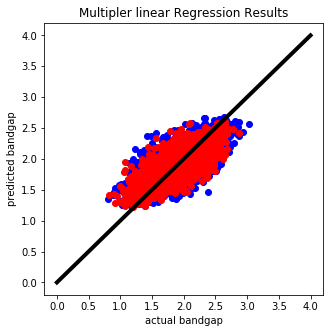

In [5]:
MLR = linear_model.LinearRegression()
MLR.fit(X_train,y_train)
ytest_Pred1 = MLR.predict(X_test)
ytrain_Pred = MLR.predict(X_train)
plt.figure(figsize=(5,5))
plt.scatter(y_train,ytrain_Pred,color='blue')
plt.scatter(y_test,ytest_Pred1,color='r')
plt.plot([0,4],[0,4],lw=4,color='black')
plt.title('Multipler linear Regression Results')
plt.xlabel('actual bandgap')
plt.ylabel('predicted bandgap')
plt.show()

In [6]:
scores = cross_val_score(MLR, X, y.ravel(), cv=4)
# K-fold   mean of scores
eva['Multiple Linear']=[mean_square_error(y_test,ytest_Pred1),
                        mean_absolute_error(y_test,ytest_Pred1),
                       mean_absolute_percentage_error(y_test,ytest_Pred1),
                       r2_score(y_test,ytest_Pred1),
                       np.mean(scores)]
eva

,error,Multiple Linear,Random Forest,Polynomial,Neural Network
0,MSE,0.045093,NaN,NaN,NaN
1,MAE,0.165998,NaN,NaN,NaN
2,MAPE,0.092812,NaN,NaN,NaN
3,R2,0.593371,NaN,NaN,NaN
4,Kfold,0.591291,NaN,NaN,NaN


# Random Forest Regression

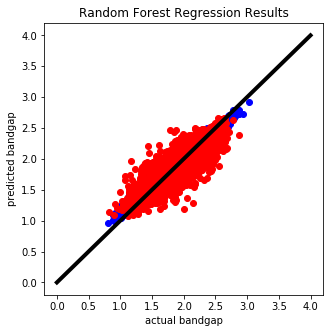

In [7]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 300, random_state = 0)
regressor.fit(X_train,y_train.ravel())

# Predicting a new result with the Random Forest Regression

ytrain_Pred = regressor.predict(X_train)
ytest_Pred2 = regressor.predict(X_test).reshape(-1,1)

# Visualising the Random Forest Regression results in higher resolution and smoother curve
plt.figure(figsize=(5,5))
plt.scatter(y_train,ytrain_Pred, color = 'blue')
plt.scatter(y_test,ytest_Pred2, color = 'red')
#plt.plot(X_Grid, regressor.predict(X_Grid), color = 'black')
plt.plot([0,4],[0,4],lw=4,color='black')
plt.title('Random Forest Regression Results')
plt.xlabel('actual bandgap')
plt.ylabel('predicted bandgap')
plt.show()

In [8]:
scores = cross_val_score(regressor, X, y.ravel(), cv=4)
# K-fold   mean of scores
eva['Random Forest']=[mean_square_error(y_test,ytest_Pred2),
                      mean_absolute_error(y_test,ytest_Pred2),
                      mean_absolute_percentage_error(y_test,ytest_Pred2),
                      r2_score(y_test,ytest_Pred2),
                      np.mean(scores)]
eva

,error,Multiple Linear,Random Forest,Polynomial,Neural Network
0,MSE,0.045093,0.035782,NaN,NaN
1,MAE,0.165998,0.142495,NaN,NaN
2,MAPE,0.092812,0.079253,NaN,NaN
3,R2,0.593371,0.677337,NaN,NaN
4,Kfold,0.591291,0.678493,NaN,NaN


# Polynomial Regression

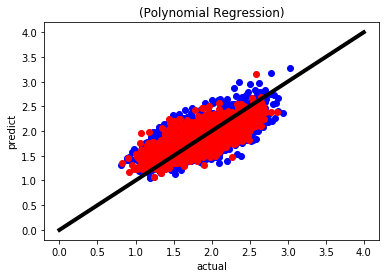

In [9]:
lin_reg = LinearRegression()
#lin_reg.fit(X, y)

# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X_train)
poly_reg.fit(X_poly, y_train)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y_train)

# Visualising the Polynomial Regression results
ytrain_Pred = lin_reg_2.predict(poly_reg.fit_transform(X_train))
ytest_Pred3 = lin_reg_2.predict(poly_reg.fit_transform(X_test))

plt.scatter(y_train,ytrain_Pred, color = 'blue')
plt.scatter(y_test,ytest_Pred3, color = 'red')
plt.plot([0,4],[0,4],lw=4,color='black')
plt.title('(Polynomial Regression)')
plt.xlabel('actual')
plt.ylabel('predict')

plt.show()

In [10]:
scores = cross_val_score(lin_reg_2, X, y.ravel(), cv=4)
# K-fold   mean of scores
eva['Polynomial']=[mean_square_error(y_test,ytest_Pred3),
                   mean_absolute_error(y_test,ytest_Pred3),
                   mean_absolute_percentage_error(y_test,ytest_Pred3),
                   r2_score(y_test,ytest_Pred3),
                   np.mean(scores)]
eva

,error,Multiple Linear,Random Forest,Polynomial,Neural Network
0,MSE,0.045093,0.035782,0.043639,NaN
1,MAE,0.165998,0.142495,0.162765,NaN
2,MAPE,0.092812,0.079253,0.090762,NaN
3,R2,0.593371,0.677337,0.606488,NaN
4,Kfold,0.591291,0.678493,0.591291,NaN


# Neural Network

In [11]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor


import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

%matplotlib inline

Using TensorFlow backend.


In [12]:
# create the scaler from the training data only and keep it for later use
X_train_scaler = StandardScaler().fit(X_train)
# apply the scaler transform to the training data
X_train = X_train_scaler.transform(X_train)
X_test = X_train_scaler.transform(X_test)

In [13]:
from keras import regularizers

def neural_model():
    # assemble the structure
    model = Sequential()
    model.add(Dense(5, input_dim=5, kernel_initializer='normal', activation='relu',kernel_regularizer=regularizers.l2(0.01)))
    model.add(Dense(8, kernel_initializer='normal', activation='relu',kernel_regularizer=regularizers.l2(0.01)))
    #model.add(Dense(4, kernel_initializer='normal',activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    # compile the model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [14]:
# initialize the andom seed as this is used to generate
# the starting weights
np.random.seed(1234)
# create the NN framework
estimator = KerasRegressor(build_fn=neural_model,
        epochs=1200, batch_size=25000, verbose=0)
history = estimator.fit(X_train, y_train, validation_split=0.33, epochs=1200, 
        batch_size=10000, verbose=0)
print("final MSE for train is %.2f and for validation is %.2f" % 
      (history.history['loss'][-1], history.history['val_loss'][-1]))

final MSE for train is 0.06 and for validation is 0.06


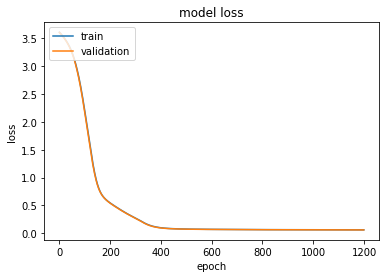

In [15]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

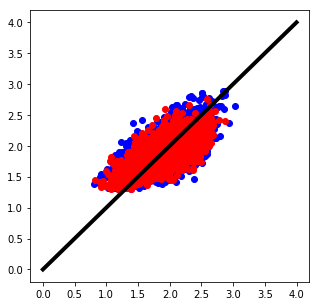

In [16]:
plt.figure(figsize=(5,5))
ytest_Pred4 = estimator.predict(X_test)
plt.scatter(y_train,estimator.predict(X_train), color = 'blue')
plt.scatter(y_test,ytest_Pred4, color = 'red')
plt.plot([0,4],[0,4],lw=4,color='black')

In [17]:
scores = cross_val_score(estimator, X, y.ravel(), cv=4)
# K-fold   mean of scores
eva['Neural Network']=[mean_square_error(y_test,ytest_Pred4),
                        mean_absolute_error(y_test,ytest_Pred4),
                       mean_absolute_percentage_error(y_test,ytest_Pred4),
                       r2_score(y_test,ytest_Pred4),
                      np.mean(scores)]
eva

,error,Multiple Linear,Random Forest,Polynomial,Neural Network
0,MSE,0.045093,0.035782,0.043639,0.171978
1,MAE,0.165998,0.142495,0.162765,0.333750
2,MAPE,0.092812,0.079253,0.090762,0.187071
3,R2,0.593371,0.677337,0.606488,0.565187
4,Kfold,0.591291,0.678493,0.591291,-0.078830


# Visualization

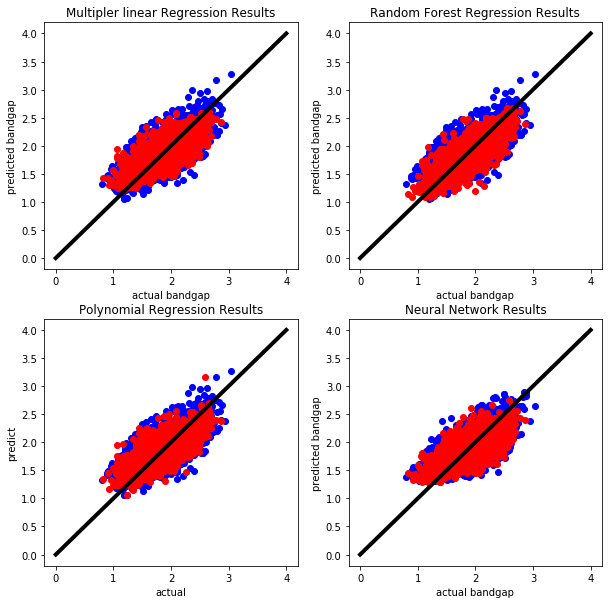

In [18]:
plt.figure(figsize=(10,10))
ax1 = plt.subplot(2,2,1)
plt.scatter(y_train,ytrain_Pred,color='blue')
plt.scatter(y_test,ytest_Pred1,color='r')
plt.plot([0,4],[0,4],lw=4,color='black')
plt.title('Multipler linear Regression Results')
plt.xlabel('actual bandgap')
plt.ylabel('predicted bandgap')

ax2 = plt.subplot(2,2,2)
plt.scatter(y_train,ytrain_Pred, color = 'blue')
plt.scatter(y_test,ytest_Pred2, color = 'red')
#plt.plot(X_Grid, regressor.predict(X_Grid), color = 'black')
plt.plot([0,4],[0,4],lw=4,color='black')
plt.title('Random Forest Regression Results')
plt.xlabel('actual bandgap')
plt.ylabel('predicted bandgap')

ax3 = plt.subplot(2,2,3)
plt.scatter(y_train,ytrain_Pred, color = 'blue')
plt.scatter(y_test,ytest_Pred3, color = 'red')
plt.plot([0,4],[0,4],lw=4,color='black')
plt.title('Polynomial Regression Results')
plt.xlabel('actual')
plt.ylabel('predict')

ax4 = plt.subplot(2,2,4)
prediction = estimator.predict(X_test)
plt.scatter(y_train,estimator.predict(X_train), color = 'blue')
plt.scatter(y_test,ytest_Pred4, color = 'red')
plt.plot([0,4],[0,4],lw=4,color='black')
plt.title('Neural Network Results')
plt.xlabel('actual bandgap')
plt.ylabel('predicted bandgap')
plt.show()